

### About the Author

**Khaled Ashraf** is an AI Engineer specializing in machine learning and computer vision. With a passion for developing innovative solutions and analyzing complex data, Khaled focuses on applying advanced techniques to real-world problems. In this notebook, Khaled explores head pose estimation using the **Mediapipe** library, showcasing how modern computer vision tools can be utilized for precise and efficient analysis of head orientation.

### Introduction: Head Pose Estimation Using Mediapipe

In this notebook, we demonstrate how to estimate head pose using the **Mediapipe** library, developed by Google for advanced computer vision applications. The primary objective of this code is to compute three key angles of head orientation: roll, pitch, and yaw from a collection of images.

#### **Overview of Mediapipe**
**Mediapipe** is a versatile framework provided by Google, designed to facilitate the development of computer vision and machine learning applications. It includes a variety of pre-trained models that can perform tasks such as face detection, hand tracking, and pose estimation with high accuracy.

#### **Purpose of This Code**
1. **Setup and Installation**:
   - **Libraries**: We start by importing necessary libraries: `cv2` for image processing, `mediapipe` for analyzing facial landmarks, `numpy` for numerical operations, and `pandas` for managing data.
   - **Installing Mediapipe**: If Mediapipe is not already available, we use `pip` to install it.

2. **Initialize Mediapipe FaceMesh**:
   - We configure the **FaceMesh** model from Mediapipe to detect and analyze facial landmarks from the images provided.

3. **Load and Process Images**:
   - **Image Directory**: We specify the path to the folder containing the images and list all relevant image files.
   - **Angle Calculation**: For each image, we compute the roll, pitch, and yaw angles by analyzing facial landmarks extracted by the FaceMesh model.

4. **Store and Save Results**:
   - **Data Storage**: We compile the results into a DataFrame, which includes the image filenames along with the computed angles.
   - **Export Data**: Finally, we save the DataFrame as a CSV file to the `/kaggle/working/` directory, making it available for download and further analysis.

#### **Code Functionality**
1. **Library Initialization**: We set up all required libraries and tools.
2. **Image Handling**: Images are loaded from the specified directory for analysis.
3. **Pose Estimation**: Head pose angles are computed for each image using Mediapipe's FaceMesh model.
4. **Data Management**: Results are stored in a DataFrame and saved as a CSV file for ease of access.

This notebook provides a streamlined approach to head pose estimation, utilizing advanced computer vision techniques to derive meaningful orientation data from facial images.

---



 install mediapipe


In [1]:
!pip install mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 17.0.0 which is incompatible.


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1726595437.776832      73 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726595437.794742      73 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726595437.852344      72 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/opt/conda/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Roll: -0.84°
Pitch: 89.97°
Yaw: -91.44°


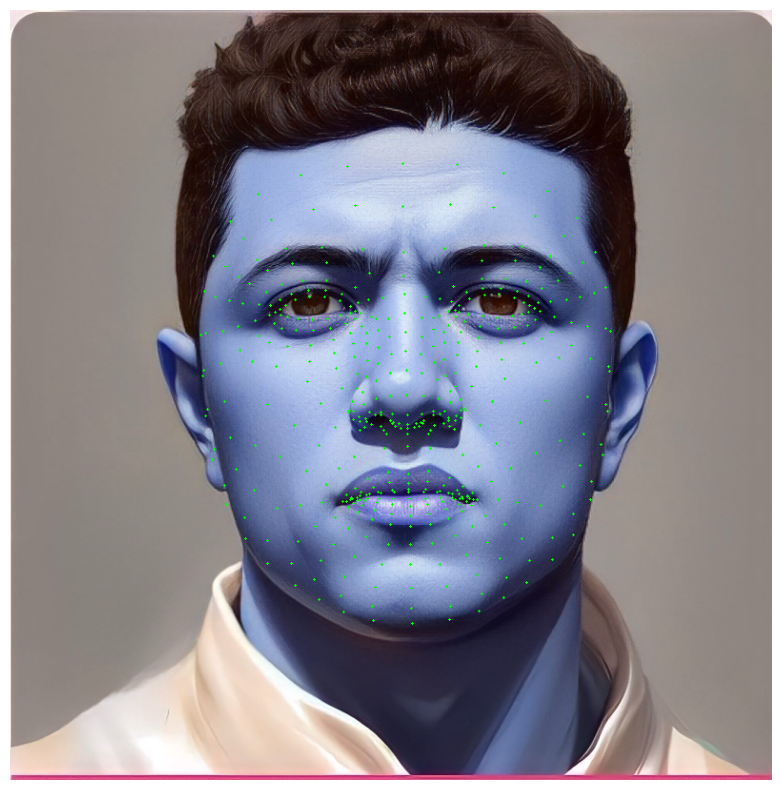

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize Mediapipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

# Define the image path (change this path as needed for Kaggle)
image_path = '/kaggle/input/image-test/16.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Failed to load the image. Please check the path.")
else:
    # Resize image for better visualization
    image = cv2.resize(image, (800, int(image.shape[0] * 800 / image.shape[1])))

    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image with Mediapipe FaceMesh
    results = face_mesh.process(image_rgb)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks = []
            for landmark in face_landmarks.landmark:
                h, w, _ = image.shape
                x, y, z = int(landmark.x * w), int(landmark.y * h), landmark.z
                landmarks.append((x, y, z))
                cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

            nose_tip = landmarks[1]
            chin = landmarks[152]
            left_eye = landmarks[33]
            right_eye = landmarks[263]

            roll = np.arctan2(right_eye[1] - left_eye[1], right_eye[0] - left_eye[0])
            pitch = np.arctan2(chin[1] - nose_tip[1], chin[2] - nose_tip[2])
            yaw = np.arctan2(nose_tip[0] - chin[0], nose_tip[2] - chin[2])

            print(f"Roll: {np.degrees(roll):.2f}°")
            print(f"Pitch: {np.degrees(pitch):.2f}°")
            print(f"Yaw: {np.degrees(yaw):.2f}°")

    # Convert the image back to BGR for OpenCV compatibility and then to RGB for matplotlib
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Display the image with matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [3]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import os

# Initialize Mediapipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

# Define paths
image_folder_path = '/kaggle/input/head-pose-estimation-data-pitch-roll-yaw/New folder'

# Get list of image files
image_files = [f for f in os.listdir(image_folder_path) if f.endswith('.jpg') or f.endswith('.png')]

# Initialize lists for DataFrame
image_paths = []
rolls = []
pitches = []
yaws = []

def calculate_pose_angles(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None, None, None
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image_rgb)
    
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks = []
            for landmark in face_landmarks.landmark:
                h, w, _ = image.shape
                x, y, z = int(landmark.x * w), int(landmark.y * h), landmark.z
                landmarks.append((x, y, z))
            
            nose_tip = landmarks[1]
            chin = landmarks[152]
            left_eye = landmarks[33]
            right_eye = landmarks[263]
            
            roll = np.arctan2(right_eye[1] - left_eye[1], right_eye[0] - left_eye[0])
            pitch = np.arctan2(chin[1] - nose_tip[1], chin[2] - nose_tip[2])
            yaw = np.arctan2(nose_tip[0] - chin[0], nose_tip[2] - chin[2])
            
            return np.degrees(roll), np.degrees(pitch), np.degrees(yaw)
    
    return None, None, None

for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    roll, pitch, yaw = calculate_pose_angles(image_path)
    
    if roll is not None and pitch is not None and yaw is not None:
        image_paths.append(image_file)  # Save just the file name, not the full path
        rolls.append(roll)
        pitches.append(pitch)
        yaws.append(yaw)

# Create a DataFrame
df = pd.DataFrame({
    'Image Path': image_paths,
    'Roll': rolls,
    'Pitch': pitches,
    'Yaw': yaws
})

# Define the path to save the CSV file
csv_file_path = '/kaggle/working/head_pose_estimation_data.csv'

# Save DataFrame to CSV
df.to_csv(csv_file_path, index=False)

print(f"CSV file saved to: {csv_file_path}")
print(df.head())


W0000 00:00:1726595438.564071      86 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726595438.579080      86 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


CSV file saved to: /kaggle/working/head_pose_estimation_data.csv
       Image Path       Roll      Pitch        Yaw
0  image03479.jpg  -4.214179  89.914642  90.560904
1  image00558.jpg  -2.181641  89.840215 -90.396499
2  image01352.jpg  -3.632951  89.877990  90.506329
3  image00490.jpg  -3.035569  89.888214 -90.614799
4  image02795.jpg -35.297143  89.824659 -90.533022
